In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from math import log

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from modules.extractors import salary, height, weight, age

In [2]:
df = pd.read_csv("data/raw/nba2k-full.csv")
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [4]:
df.isna().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        69
version         0
dtype: int64

In [5]:
len(df.position.unique())

7

In [6]:
df.drop(["full_name", "jersey", "team", "country", "college", "version", "draft_year", "draft_round", "draft_peak"], axis=1, inplace=True)
df.salary = df.salary.pipe(salary)
df.height = df.height.pipe(height)
df.weight = df.weight.pipe(weight)
df = df.assign(age=df.b_day.pipe(age))
df.drop("b_day", axis=1, inplace=True)
df.head()

,rating,position,height,weight,salary,age
0,97,F,2.06,113.4,37436858,36
1,97,F,2.01,102.1,32742000,29
2,96,F-G,2.11,109.8,25842697,26
3,96,F,2.08,104.3,37199000,32
4,96,G,1.96,99.8,38199000,31


In [7]:
columns = ["rating", "weight", "height", "salary", "age"]
for column in columns:
    print(
        f"Column: {column} p-value of being normal: {stats.normaltest(df[column]).pvalue:.4f}; p-value of being log-normal: {stats.normaltest(df[column].map(log)).pvalue:.4f}"
    )

Column: rating p-value of being normal: 0.0000; p-value of being log-normal: 0.0000
Column: weight p-value of being normal: 0.0060; p-value of being log-normal: 0.0222
Column: height p-value of being normal: 0.0600; p-value of being log-normal: 0.0303
Column: salary p-value of being normal: 0.0000; p-value of being log-normal: 0.0000
Column: age p-value of being normal: 0.0001; p-value of being log-normal: 0.0000


In [8]:
X = df[columns]
Y = LabelEncoder().fit_transform(df.position)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=Y,
                                                    shuffle=True)

In [9]:
for (name, model) in [
        ("Decision tree", DecisionTreeClassifier(random_state=1)),
        ("Random forest", RandomForestClassifier(n_estimators=100, random_state=1)),
        ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ("Logistic regression", LogisticRegression(random_state=1)),
        ("Sigmoid SVM", SVC(kernel='sigmoid', random_state=1)),
        ("Linear SVM", LinearSVC(max_iter=1e5, random_state=1)),
        ("MLP", MLPClassifier(random_state=1))
        ]:
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print(
        f"{name} has balanced accuracy of {balanced_accuracy_score(y_test, predicted, adjusted=True)}"
    )

Decision tree has balanced accuracy of 0.31800421800421796
Random forest has balanced accuracy of 0.31924464424464427
KNN has balanced accuracy of 0.010481185481185507
Logistic regression has balanced accuracy of 0.0
Sigmoid SVM has balanced accuracy of 0.04273504273504274
Linear SVM has balanced accuracy of 0.007672882672882704
MLP has balanced accuracy of 0.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


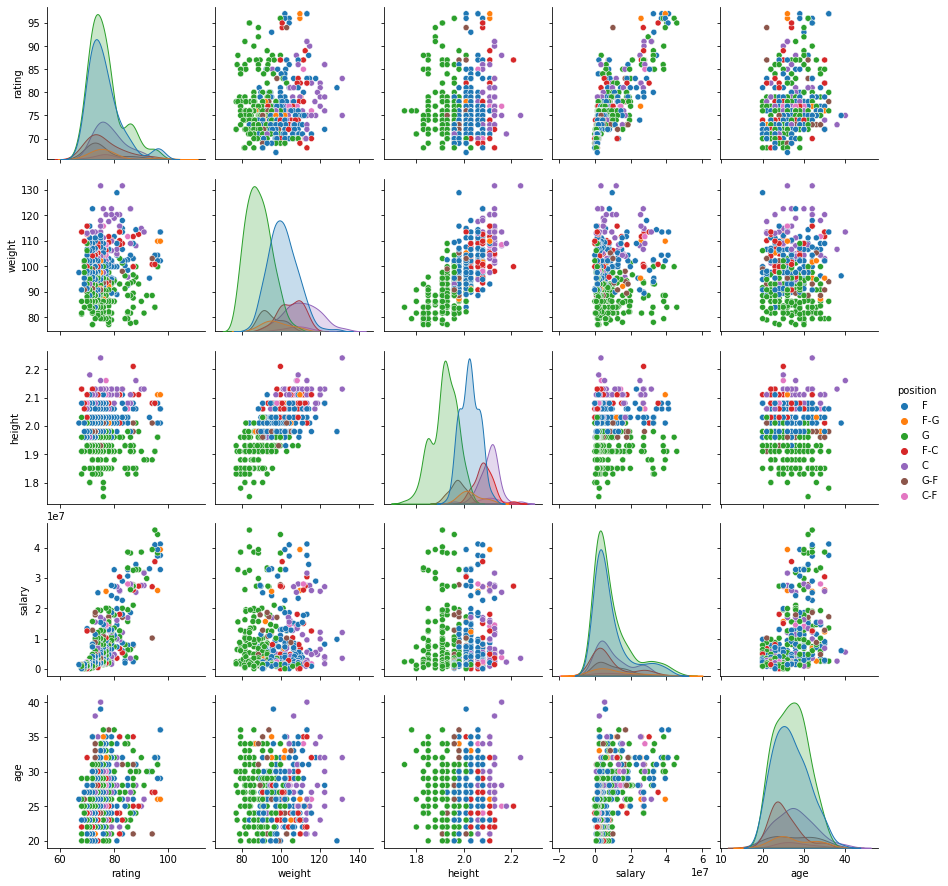

In [10]:
sns.pairplot(pd.concat([X, df.position], axis=1), hue='position')

<AxesSubplot:xlabel='weight', ylabel='Count'>

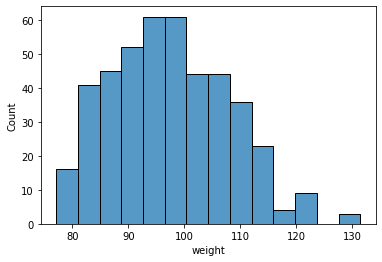

In [11]:
sns.histplot(df, x="weight")

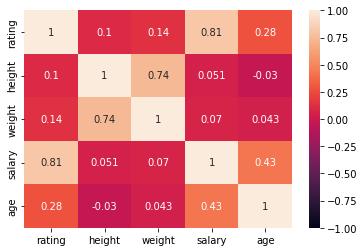

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);